In [1]:
import pandas as pd 
dt = pd.read_csv("covid19_confirmed.csv")
dt2 = pd.read_csv("Global_Mobility_Report.csv")

/Users/irenecho/work/venv/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Covid19_confirmed data preprocessing

In [3]:
usc = dt[dt['Country/Region'] == 'US']
usc = pd.melt(usc, id_vars='Country/Region', value_vars=usc.iloc[:,4:],
        var_name='date', value_name='confirmed_cases')
usc['date'] = pd.to_datetime(usc.date)
usc = usc.rename(columns={'Country/Region':'Country'})
usc.tail(3)

,Country,date,confirmed_cases
125,US,2020-05-26,1680913
126,US,2020-05-27,1699176
127,US,2020-05-28,1721753


In [4]:
len(usc)

128

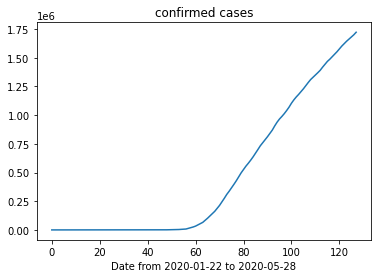

In [5]:
_ = plt.plot(range(0,128),usc['confirmed_cases'])
_ = plt.title('confirmed cases')
_ = plt.xlabel("Date from 2020-01-22 to 2020-05-28")
#_ = plt.xticks(rotation='vertical')

In [6]:
usc['month'] = pd.DatetimeIndex(usc['date']).month
usc2 = round(usc.groupby(['Country','month']).mean(),2)
usc2 = usc2.reset_index()
usc2

,Country,month,confirmed_cases
0,US,1,3.80
1,US,2,21.45
2,US,3,35097.42
3,US,4,650783.47
4,US,5,1425268.29


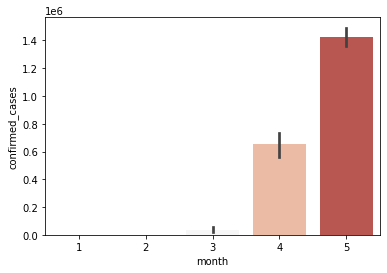

In [7]:
_=sns.barplot(x=usc['month'], y=usc['confirmed_cases'] , palette="RdBu_r")

## Global_Mobility_Report data preprocessing

In [5]:
dt2.head(3)

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0


In [8]:
usm = dt2[dt2['country_region']=='United States']
usm.head(3)

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
170058,US,United States,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
170059,US,United States,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
170060,US,United States,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0


In [9]:
usm = round(usm.groupby(['country_region_code','date']).mean(),2)
usm = usm.reset_index()
usm = usm.rename(columns={'country_region_code':'Country'})


In [10]:
usm['date']=pd.to_datetime(usm.date)
usm.head(3)

,Country,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,2020-02-15,6.44,2.38,16.66,4.31,0.44,-0.55
1,US,2020-02-16,7.99,2.51,17.79,3.75,0.48,-0.66
2,US,2020-02-17,3.87,-0.35,27.88,1.81,-17.58,4.36


## Merge 2 datasets

In [11]:
df =pd.merge(usc,usm,how='inner',on=['Country','date'])

In [12]:
df.head()

,Country,date,confirmed_cases,month,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,2020-02-15,13,2,6.44,2.38,16.66,4.31,0.44,-0.55
1,US,2020-02-16,13,2,7.99,2.51,17.79,3.75,0.48,-0.66
2,US,2020-02-17,13,2,3.87,-0.35,27.88,1.81,-17.58,4.36
3,US,2020-02-18,13,2,-0.19,-1.27,5.36,2.24,-0.01,0.79
4,US,2020-02-19,13,2,2.08,0.58,7.99,2.47,0.88,0.18


In [16]:
df.columns
df =df.drop(['month'],axis=1)

In [17]:
df.columns =['Country', 'date', 'confirmed_cases',
       'retail_and_recreation','grocery_and_pharmacy',
       'parks','transit_stations','workplaces','residential']
df.head()

,Country,date,confirmed_cases,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,US,2020-02-15,13,6.44,2.38,16.66,4.31,0.44,-0.55
1,US,2020-02-16,13,7.99,2.51,17.79,3.75,0.48,-0.66
2,US,2020-02-17,13,3.87,-0.35,27.88,1.81,-17.58,4.36
3,US,2020-02-18,13,-0.19,-1.27,5.36,2.24,-0.01,0.79
4,US,2020-02-19,13,2.08,0.58,7.99,2.47,0.88,0.18


In [18]:
cor = df.iloc[:,2:].corr()
cor

,confirmed_cases,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
confirmed_cases,1.000000,-0.353001,-0.216438,0.273133,-0.454351,-0.549371,0.466812
retail_and_recreation,-0.353001,1.000000,0.750166,0.551487,0.978292,0.907647,-0.891588
grocery_and_pharmacy,-0.216438,0.750166,1.000000,0.574891,0.752479,0.655333,-0.614673
parks,0.273133,0.551487,0.574891,1.000000,0.523952,0.386286,-0.450085
transit_stations,-0.454351,0.978292,0.752479,0.523952,1.000000,0.935724,-0.906953
workplaces,-0.549371,0.907647,0.655333,0.386286,0.935724,1.000000,-0.975518
residential,0.466812,-0.891588,-0.614673,-0.450085,-0.906953,-0.975518,1.000000


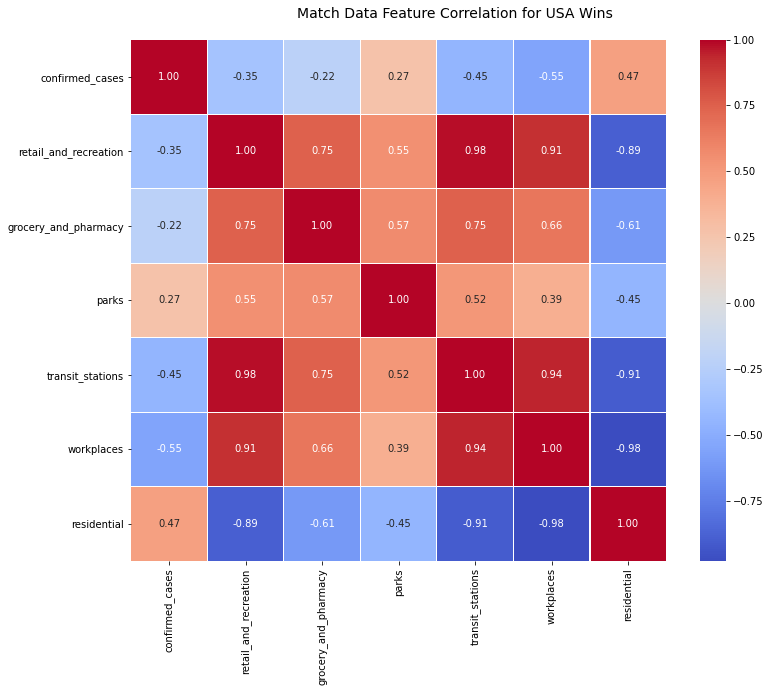

In [19]:
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(cor,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Match Data Feature Correlation for USA Wins', fontsize=14)

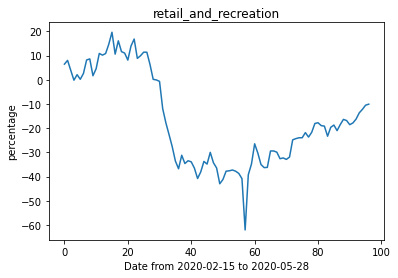

In [20]:
_ = plt.plot(range(0,97),df['retail_and_recreation'])
_ = plt.title('retail_and_recreation')
_ = plt.xlabel("Date from 2020-02-15 to 2020-05-28")
_ = plt.ylabel("percentage")

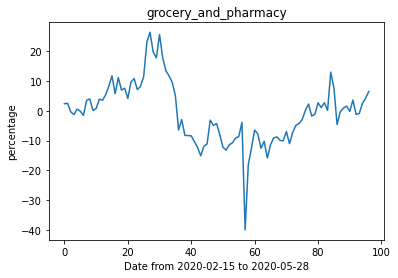

In [21]:
_ = plt.plot(range(0,97),df['grocery_and_pharmacy'])
_ = plt.title('grocery_and_pharmacy')
_ = plt.xlabel("Date from 2020-02-15 to 2020-05-28")
_ = plt.ylabel("percentage")

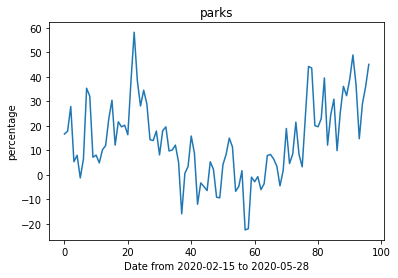

In [22]:
_ = plt.plot(range(0,97),df['parks'])
_ = plt.title('parks')
_ = plt.xlabel("Date from 2020-02-15 to 2020-05-28")
_ = plt.ylabel("percentage")

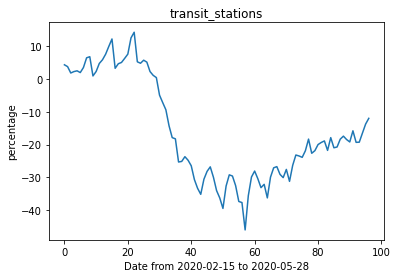

In [23]:
_ = plt.plot(range(0,97),df['transit_stations'])
_ = plt.title('transit_stations')
_ = plt.xlabel("Date from 2020-02-15 to 2020-05-28")
_ = plt.ylabel("percentage")

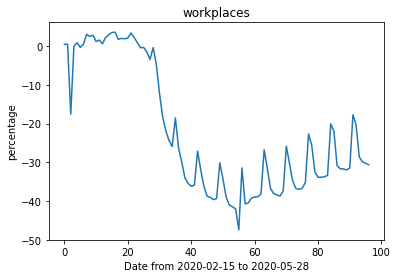

In [24]:
_ = plt.plot(range(0,97),df['workplaces'])
_ = plt.title('workplaces')
_ = plt.xlabel("Date from 2020-02-15 to 2020-05-28")
_ = plt.ylabel("percentage")

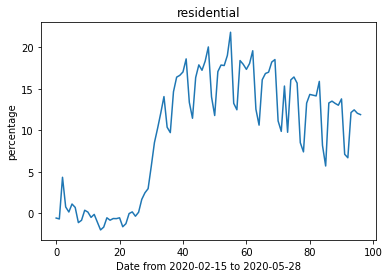

In [25]:
_ = plt.plot(range(0,97),df['residential'])
_ = plt.title('residential')
_ = plt.xlabel("Date from 2020-02-15 to 2020-05-28")
_ = plt.ylabel("percentage")

In [35]:
df.to_csv('processed_dt')

## Statistical Analysis (Pycaret)

In [39]:
df = df.iloc[:,0:9]

In [40]:
temp = df.iloc[:,1:3]
temp['date'] =pd.to_datetime(temp['date']) + pd.DateOffset(days=5)
temp =temp.rename(columns={'confirmed_cases':'predicted_cases'})
temp.head()

,date,predicted_cases
0,2020-02-20,13
1,2020-02-21,13
2,2020-02-22,13
3,2020-02-23,13
4,2020-02-24,13


In [41]:
temp2 = pd.merge(temp,df,how='inner', on ='date')
temp2 = temp2.drop(['Country','confirmed_cases','date'],axis=1)

In [42]:
from pycaret.regression import *

In [45]:
exp_reg101 = setup(data = temp2, target = 'predicted_cases', session_id=123)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(92, 7)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [46]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,123571.004800,40245984888.697098,186075.372600,-0.177600,2.484900,44.025000
1,Gradient Boosting Regressor,129008.897900,42114765515.065300,190964.800500,-0.522900,2.397200,60.027900
2,AdaBoost Regressor,119924.649600,33841508023.260601,175005.348800,-0.749000,1.457300,9.442100
3,Support Vector Machine,408802.074000,333814196003.098022,546670.611500,-1.715000,4.604400,1504.634500
4,CatBoost Regressor,152035.864500,46634424441.453903,207277.206700,-2.375100,3.264800,224.059000
5,Least Angle Regression,270776.442300,98295649286.212997,307855.533900,-2.814200,4.589100,2558.082400
6,Linear Regression,270776.442300,98295649286.212906,307855.533900,-2.814200,4.589100,2558.082400
7,Lasso Regression,270776.364500,98295626039.759903,307855.468500,-2.814200,4.589100,2558.084100
8,Lasso Least Angle Regression,270771.312100,98292660635.085098,307848.500900,-2.816200,4.589100,2558.148400
9,Ridge Regression,270649.142400,98215972387.680099,307708.924700,-2.820400,4.588900,2558.925400


In [50]:
tuned_dt= tune_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,113052.2872,2.590154e+10,160939.5431,0.8950,0.9097,1.0776
1,52296.6753,5.514445e+09,74259.3107,0.9777,1.0959,2.0538
2,131421.5801,6.029643e+10,245553.3155,0.4803,2.0356,19.2289
3,55915.0553,6.111520e+09,78176.2091,0.9754,0.5834,0.6959
4,103566.8389,4.055273e+10,201377.0752,0.8373,1.4516,3.4642
5,98530.0198,2.168764e+10,147267.2536,-8.5396,1.8438,6.4339
6,102811.9833,1.584313e+10,125869.5067,0.9472,1.1561,2.7627
7,149271.4998,3.535634e+10,188032.8156,0.6960,1.1946,2.5373
8,221042.2735,7.042184e+10,265371.1302,0.7049,1.9085,10.1935
9,183796.1132,7.591291e+10,275522.9778,0.6946,0.6006,0.2451


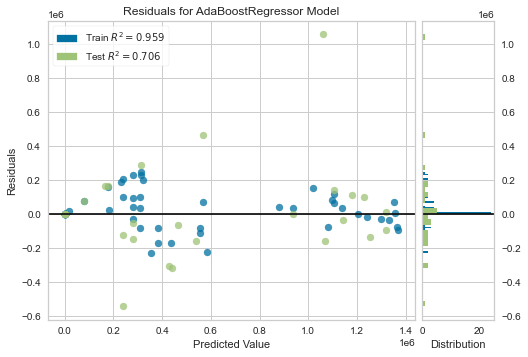

In [51]:
plot_model(tuned_dt)

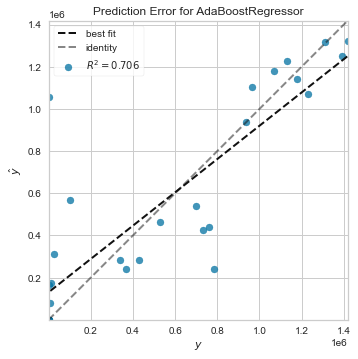

In [52]:
plot_model(tuned_dt, plot = 'error')

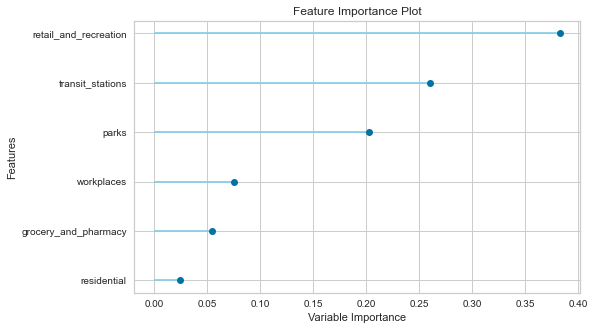

In [53]:
plot_model(tuned_dt, plot = 'feature')

In [54]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [55]:
predict_model(tuned_dt)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ada Boost Regressor,168389.4785,7.601379e+10,275705.9767,0.7062,1.776,17.6689


,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,predicted_cases,Label
0,-21.84,0.13,23.87,-21.90,-35.19,15.70,965785,1.105664e+06
1,-29.92,-8.74,3.53,-26.73,-38.43,17.02,700062,5.396298e+05
2,-27.62,9.57,10.11,-17.89,-25.93,14.08,3536,1.653624e+05
3,-39.23,-18.01,-21.97,-35.61,-40.48,18.42,428654,2.812194e+05
4,-13.67,-0.87,14.73,-19.28,-28.65,12.16,1390406,1.253094e+06
5,1.64,0.12,7.19,0.91,2.83,0.39,13,1.490000e+02
6,-36.76,-6.41,5.19,-25.32,-26.30,9.74,6437,8.090545e+04
7,-19.16,2.74,39.53,-18.90,-33.76,14.16,1132539,1.229582e+06
8,-19.65,12.98,24.48,-17.89,-20.06,8.20,1180375,1.143876e+06
9,-23.96,-2.93,3.28,-23.90,-36.75,16.44,938154,9.381457e+05
